In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("C:\\Users\\Shobhan Sarkar\\OneDrive\\Desktop\\energy papers\\BTC-USD.csv")

# Display the first few rows of the dataframe
print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2015-02-01  216.867004  265.610992  212.014999  254.263000  254.263000   
1  2015-03-01  254.283005  300.044006  236.514999  244.223999  244.223999   
2  2015-04-01  244.223007  261.798004  214.873993  236.145004  236.145004   
3  2015-05-01  235.938995  247.804001  228.572998  230.190002  230.190002   
4  2015-06-01  230.233002  267.867004  221.296005  263.071991  263.071991   

      Volume  
0  711518700  
1  959098300  
2  672338700  
3  568122600  
4  629780200  


In [9]:
import pandas as pd

# Assuming your DataFrame is already loaded as df
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Assuming the 6th column contains the BTC data
BTC_DATA = df.iloc[:, 5]  # Assuming 0-based indexing, change the index if needed

# Resample the data to monthly frequency (assuming it's daily)
BTC_DATA = BTC_DATA.resample('M').mean()

# Display the resulting time series data
print(BTC_DATA)


Date
2015-02-28    7.115187e+08
2015-03-31    9.590983e+08
2015-04-30    6.723387e+08
2015-05-31    5.681226e+08
2015-06-30    6.297802e+08
                  ...     
2024-01-31    8.259189e+11
2024-02-29    8.307219e+11
2024-03-31    1.446418e+12
2024-04-30    1.016068e+12
2024-05-31    5.667720e+10
Freq: M, Name: Volume, Length: 112, dtype: float64


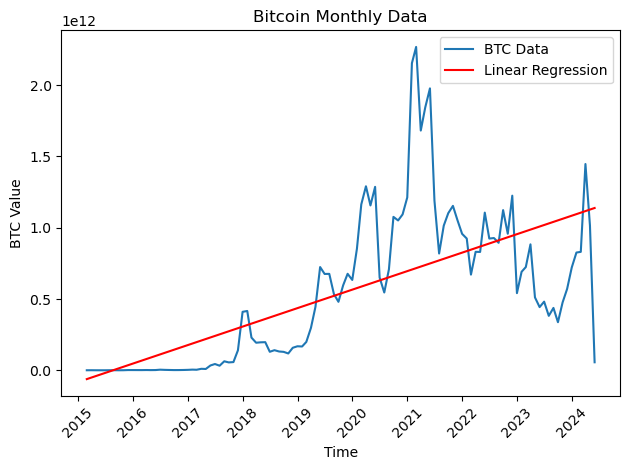

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress

# Assuming BTCDATA is your time series data
# Extract the time component (assuming it's already a pandas Series with datetime index)
time = BTC_DATA.index.to_pydatetime()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mdates.date2num(time), BTC_DATA)

# Plot the data
plt.plot(time, BTC_DATA, label='BTC Data')
plt.xlabel('Time')
plt.ylabel('BTC Value')
plt.title('Bitcoin Monthly Data')

# Plot the regression line
plt.plot(time, intercept + slope * mdates.date2num(time), color='red', label='Linear Regression')

# Customize x-axis ticks to show only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming BTCDATA is your time series data
# You may need to convert your pandas Series to a DataFrame if it's not already
# Assuming your data is already stationary (i.e., differenced once)
# If not, you may need to use the diff() function to difference your data
BTCDATA_diff = BTC_DATA.diff().dropna()

# Fit ARIMA model
AR = sm.tsa.ARIMA(BTCDATA_diff, order=(2, 1, 2))
AR_results = AR.fit()

# Print model summary
print(AR_results.summary())


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  111
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3035.314
Date:                Sat, 04 May 2024   AIC                           6080.629
Time:                        15:50:38   BIC                           6094.131
Sample:                    03-31-2015   HQIC                          6086.105
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1064      0.504      0.211      0.833      -0.881       1.094
ar.L2         -0.2551      0.122     -2.087      0.037      -0.495      -0.016
ma.L1         -1.0955      0.502     -2.184      0.0

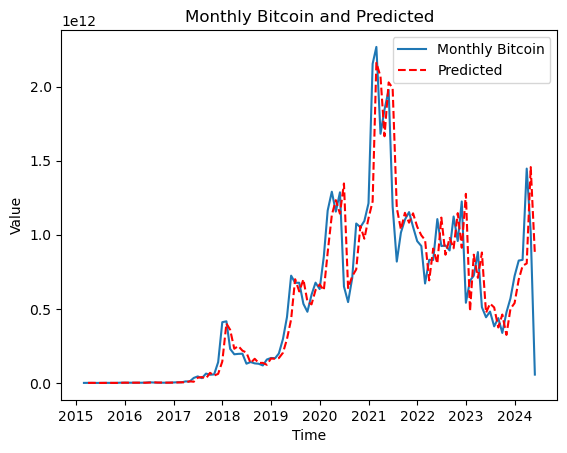

In [21]:
import matplotlib.pyplot as plt

# Plot original time series data
plt.plot(BTC_DATA, label='Monthly Bitcoin')
plt.title('Monthly Bitcoin and Predicted')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot predicted values
AR_fit = BTC_DATA - AR_results.resid
plt.plot(AR_fit, linestyle='--', color='red', label='Predicted')
plt.legend()

plt.show()


In [25]:
# Make predictions
predictions = AR_results.get_forecast(steps=50)  # Forecast 50 steps ahead
predicted_values = predictions.predicted_mean

# Access the first predicted value
first_prediction = predicted_values.iloc[0]

# Access all predicted values
all_predictions = predicted_values.values
all_predictions

array([ 9.36429275e+10,  2.52203233e+11,  4.41409245e+08, -6.67935740e+10,
       -9.72187480e+09,  1.35020027e+10,  1.41374151e+09, -5.79684173e+09,
       -3.48025605e+09, -1.39434825e+09, -1.76338778e+09, -2.33477154e+09,
       -2.30142022e+09, -2.15211042e+09, -2.14473282e+09, -2.18203719e+09,
       -2.18788819e+09, -2.17899425e+09, -2.17655539e+09, -2.17856478e+09,
       -2.17940072e+09, -2.17897706e+09, -2.17871874e+09, -2.17879933e+09,
       -2.17887380e+09, -2.17886117e+09, -2.17884083e+09, -2.17884188e+09,
       -2.17884719e+09, -2.17884748e+09, -2.17884616e+09, -2.17884594e+09,
       -2.17884626e+09, -2.17884635e+09, -2.17884628e+09, -2.17884625e+09,
       -2.17884626e+09, -2.17884627e+09, -2.17884627e+09, -2.17884626e+09,
       -2.17884627e+09, -2.17884627e+09, -2.17884627e+09, -2.17884627e+09,
       -2.17884627e+09, -2.17884627e+09, -2.17884627e+09, -2.17884627e+09,
       -2.17884627e+09, -2.17884627e+09])

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming AR is your ARIMA model
# Obtain 1-step forecast
one_step_forecast = AR_results.forecast(steps=1)

# Obtain multi-step forecasts for 5 steps ahead
multi_step_forecast = AR_results.forecast(steps=5)

# Extract the forecasted values
one_step_value = one_step_forecast[0]
five_step_values = multi_step_forecast[0]

# Print the forecasts
print("1-step forecast:", one_step_value)
print("5-step forecast:", five_step_values)


1-step forecast: 93642927511.83398
5-step forecast: 93642927511.83398
